<a href="https://colab.research.google.com/github/OurKaii/Yolo-Assignment---2/blob/main/yolo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment - 2 : Modify the Yolo model trained on the coco dataset to detect people Rollno:SE20UARI175,NAME:M.Vikas Varma

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
ls

coco.names  drive/  sample_data/  yolov4.cfg  yolov4.weights


In [34]:
!gdown https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights  ## yolov4 weights

Downloading...
From: https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights
To: /content/yolov4.weights
100% 258M/258M [00:14<00:00, 17.4MB/s]


In [35]:
!gdown https://raw.githubusercontent.com/Tianxiaomo/pytorch-YOLOv4/master/cfg/yolov4.cfg ##yolov4 cfg

Downloading...
From: https://raw.githubusercontent.com/Tianxiaomo/pytorch-YOLOv4/master/cfg/yolov4.cfg
To: /content/yolov4.cfg
12.2kB [00:00, 35.5MB/s]     


In [36]:
!gdown https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names ##coco names

Downloading...
From: https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
To: /content/coco.names
625B [00:00, 2.82MB/s]       


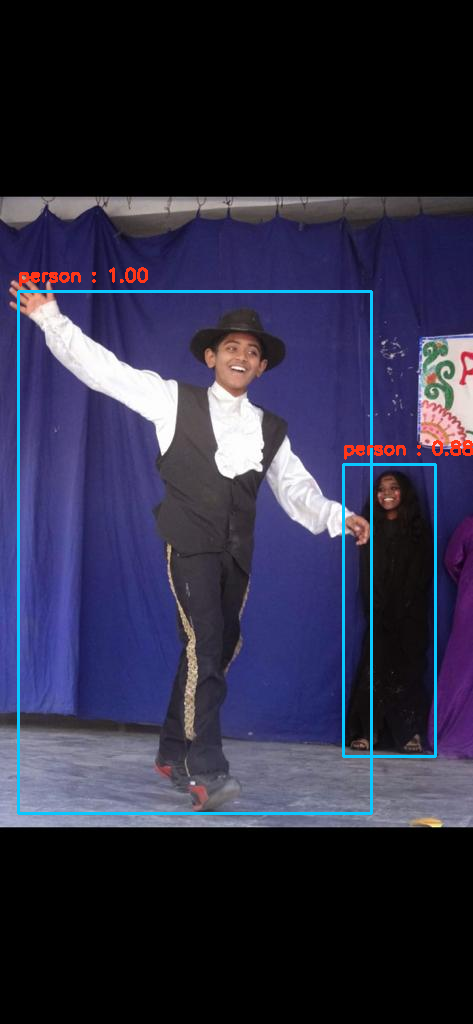

In [46]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow
confidence = 0.6
Nms= 0.3
class_names = []
with open("coco.names", "r") as f:
  class_names = [cname.strip() for cname in f.readlines()]
img = cv2.imread("/content/drive/MyDrive/Yolo/image.jpg")
arc = cv2.dnn.readNet("yolov4.weights","yolov4.cfg")
arc.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
arc.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)
model = cv2.dnn_DetectionModel(arc)
model.setInputParams(size=(640,640), scale=1/255, swapRB=True)
x =time.time()
classes, scores, boxes = model.detect(img, confidence, Nms)
for (classid, score, box) in zip(classes, scores, boxes):
        label = "%s : %.2f" % (class_names[classid],score)
        if class_names[classid] == 'person':
          cv2.rectangle(img,box,color=(255, 200, 10),thickness=2)
          cv2.putText(img, label, (box[0],box[1]-10),cv2.FONT_HERSHEY_SIMPLEX,0.6,(25,55,255),2)
cv2_imshow(img)